In [1]:
"""
Brian Sharber
CSCI 4350/5350
Dr. Joshua Phillips
Honors Contract: Fall 2019
Program Description: Uses toy data sets to illustrate the effectiveness of Spectral Clustering methods. 
Fine-tuning the affinity scaling factor (sigma) affects performance.
"""

import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
import math
from cvxpy import *
import numpy as np
import scipy.spatial.distance as sdist
from sklearn.cluster import KMeans

In [2]:
# Ground truth
f = open("ground.in", "w+")
for x in range(100):
    f.write(' {:0d}\n'.format(0))

for x in range(100):
    f.write(' {:0d}\n'.format(1))

f.close()
# Convert the floating text in the file to integers when they come in
Xassign = np.loadtxt("ground.in").astype(np.int32)
#print(ground)

In [3]:
# Make some toy data sets
# Set 1: 2 horizontal lines: 0 < y < 1
count = 0.1
f = open("lines-1.in", "w")
for x in range(100):
    f.write('{:2.2f}'.format(count))
    f.write(' {:0d}\n'.format(0))
    count += 0.1
    
count = 0.1
for x in range(100):
    f.write('{:2.2f}'.format(count))
    f.write(' {:0d}\n'.format(1))
    count += 0.1

f.close()
X = np.loadtxt("lines-1.in")

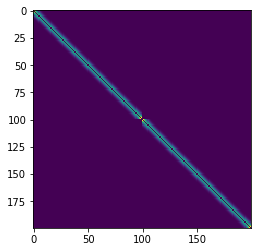

In [4]:
## Spectral Clustering
## Let's implement a simple spectral clustering of the data

# Number of points in each subspace
N1 = 100
N2 = 100

## Calculate pairwise distances (Euclidean)
Xdist = sdist.squareform(sdist.pdist(X))

## Set affinity scaling factor
sigma = .25

## Calculate affinities
Xaff = np.exp((-1.0*np.power(Xdist,2))/(2.0 * np.power(sigma,2)))
Xaff[range(N1+N2),range(N1+N2)] = 0.0
origXaff = Xaff

## Get row sums
Xaff_D = np.diagflat(1.0 / np.sqrt(np.apply_along_axis(np.sum,0,Xaff)))

## Normalization
Xnorm = np.matmul(np.matmul(Xaff_D,Xaff),Xaff_D)

## Might not want to show this if the data sizes (N1,N2)
## are large...
plt.imshow(Xnorm)

## Decomposition
Evals, Evecs = np.linalg.eigh(Xnorm)

[1.         0.99919895 0.99615897]


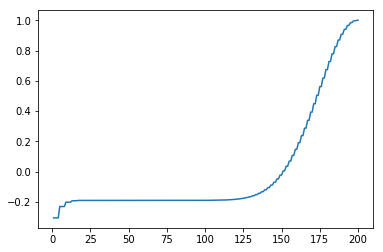

In [5]:
## Next Check the eigenvalues
print(Evals[[-1,-2,-3]])
plt.plot(np.linspace(1,len(Evals),num=len(Evals)),Evals)

Mutual Information
0.9999999999998976


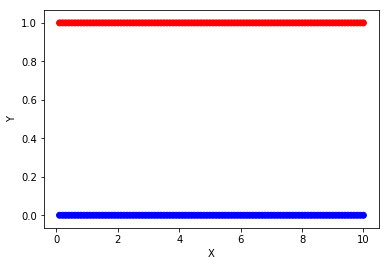

In [6]:
## Perform clustering
Xnew = Evecs[:,[-1,-2]]
kmeans = KMeans(n_clusters=2).fit(Xnew)

## If you want to see the eigen vectors...
## Xone = Evecs[kmeans.labels_==0,:]
## Xtwo = Evecs[kmeans.labels_==1,:]
## plt.plot(Xone[:,0],Xone[:,1],'bo',Xtwo[:,0],Xtwo[:,1],'ro')

## If you want it on the PCA projection...
#Xone = Xsvd[0][kmeans.labels_==0,:]
#Xtwo = Xsvd[0][kmeans.labels_==1,:]
#plt.plot(Xone[:,0],Xone[:,1],'bo',Xtwo[:,0],Xtwo[:,1],'ro')

## Generally speaking, this will do a poor job
## no matter what scaling parameter you choose above...

## Let's quantify the performance
jointPDF = np.zeros([2,2])
for x in range(len(Xassign)):
    jointPDF[Xassign[x],kmeans.labels_[x]] += 1
jointPDF /= len(Xassign)
jointPDF += 0.000000000000001
marginals = np.outer(np.apply_along_axis(np.sum,1,jointPDF),np.apply_along_axis(np.sum,0,jointPDF))
print('Mutual Information')
print(np.sum(jointPDF*np.log2(jointPDF/marginals)))

# Plot the Spectral attempt at the data
# Red will correlate to all 0's seen in kmeans.labels_, blue correlates to all 1's.
plt.scatter(X[:,0], X[:,1], color = [["red", "blue"][i] for i in kmeans.labels_])
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [7]:
# Make some toy data sets
# Set 2: 2 horizontal lines 0 < y < 4
count = 0.1
f = open("lines-2.in", "w")
for x in range(100):
    f.write('{:2.2f}'.format(count))
    f.write(' {:0d}\n'.format(0))
    count += 0.1
    
count = 0.1
for x in range(100):
    f.write('{:2.2f}'.format(count))
    f.write(' {:0d}\n'.format(4))
    count += 0.1

f.close()
X = np.loadtxt("lines-2.in")

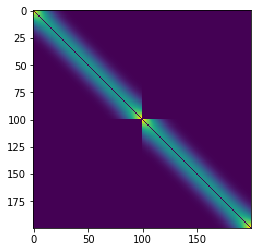

In [8]:
## Spectral Clustering
## Let's implement a simple spectral clustering of the data

# Number of points in each subspace
N1 = 100
N2 = 100

## Calculate pairwise distances (Euclidean)
Xdist = sdist.squareform(sdist.pdist(X))

## Set affinity scaling factor
sigma = 1.0

## Calculate affinities
Xaff = np.exp((-1.0*np.power(Xdist,2))/(2.0 * np.power(sigma,2)))
Xaff[range(N1+N2),range(N1+N2)] = 0.0
origXaff = Xaff

## Get row sums
Xaff_D = np.diagflat(1.0 / np.sqrt(np.apply_along_axis(np.sum,0,Xaff)))

## Normalization
Xnorm = np.matmul(np.matmul(Xaff_D,Xaff),Xaff_D)

## Might not want to show this if the data sizes (N1,N2)
## are large...
plt.imshow(Xnorm)

## Decomposition
Evals, Evecs = np.linalg.eigh(Xnorm)

[1.         0.99929892 0.9412416 ]


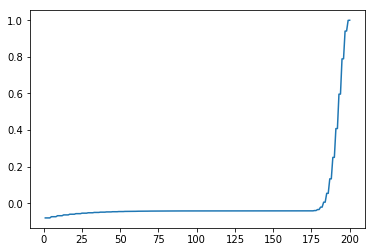

In [9]:
## Next Check the eigenvalues
print(Evals[[-1,-2,-3]])
plt.plot(np.linspace(1,len(Evals),num=len(Evals)),Evals)

Mutual Information
0.9999999999998976


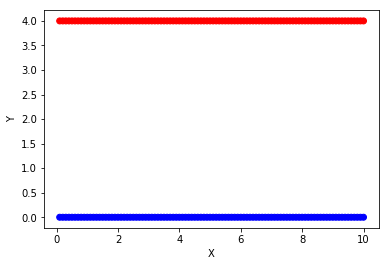

In [10]:
## Perform clustering
Xnew = Evecs[:,[-1,-2]]
kmeans = KMeans(n_clusters=2).fit(Xnew)

## If you want to see the eigen vectors...
## Xone = Evecs[kmeans.labels_==0,:]
## Xtwo = Evecs[kmeans.labels_==1,:]
## plt.plot(Xone[:,0],Xone[:,1],'bo',Xtwo[:,0],Xtwo[:,1],'ro')

## If you want it on the PCA projection...
#Xone = Xsvd[0][kmeans.labels_==0,:]
#Xtwo = Xsvd[0][kmeans.labels_==1,:]
#plt.plot(Xone[:,0],Xone[:,1],'bo',Xtwo[:,0],Xtwo[:,1],'ro')

## Generally speaking, this will do a poor job
## no matter what scaling parameter you choose above...

## Let's quantify the performance
jointPDF = np.zeros([2,2])
for x in range(len(Xassign)):
    jointPDF[Xassign[x],kmeans.labels_[x]] += 1
jointPDF /= len(Xassign)
jointPDF += 0.000000000000001
marginals = np.outer(np.apply_along_axis(np.sum,1,jointPDF),np.apply_along_axis(np.sum,0,jointPDF))
print('Mutual Information')
print(np.sum(jointPDF*np.log2(jointPDF/marginals)))

# Plot the Spectral attempt at the data
# Red will correlate to all 0's seen in kmeans.labels_, blue correlates to all 1's.
plt.scatter(X[:,0], X[:,1], color = [["red", "blue"][i] for i in kmeans.labels_])
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [11]:
# Make some toy data sets
# Set 3: horizontal lines: Illustrates K-means performs as expected 
# with enough space given between the 2 lines: 0 < y < 5
count = 0.1
f = open("lines-3.in", "w")
for x in range(100):
    f.write('{:2.2f}'.format(count))
    f.write(' {:0d}\n'.format(0))
    count += 0.1
    
count = 0.1
for x in range(100):
    f.write('{:2.2f}'.format(count))
    f.write(' {:0d}\n'.format(5))
    count += 0.1

f.close()
X = np.loadtxt("lines-3.in")

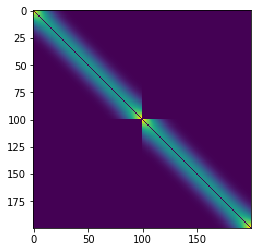

In [12]:
## Spectral Clustering
## Let's implement a simple spectral clustering of the data

# Number of points in each subspace
N1 = 100
N2 = 100

## Calculate pairwise distances (Euclidean)
Xdist = sdist.squareform(sdist.pdist(X))

## Set affinity scaling factor
sigma = 1.0

## Calculate affinities
Xaff = np.exp((-1.0*np.power(Xdist,2))/(2.0 * np.power(sigma,2)))
Xaff[range(N1+N2),range(N1+N2)] = 0.0
origXaff = Xaff

## Get row sums
Xaff_D = np.diagflat(1.0 / np.sqrt(np.apply_along_axis(np.sum,0,Xaff)))

## Normalization
Xnorm = np.matmul(np.matmul(Xaff_D,Xaff),Xaff_D)

## Might not want to show this if the data sizes (N1,N2)
## are large...
plt.imshow(Xnorm)

## Decomposition
Evals, Evecs = np.linalg.eigh(Xnorm)

[1.         0.99999221 0.94124064]


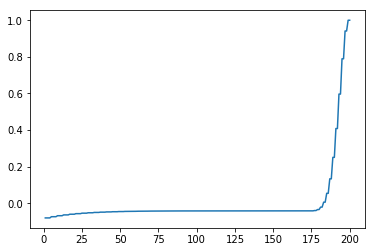

In [13]:
## Next Check the eigenvalues
print(Evals[[-1,-2,-3]])
plt.plot(np.linspace(1,len(Evals),num=len(Evals)),Evals)

Mutual Information
0.9999999999998976


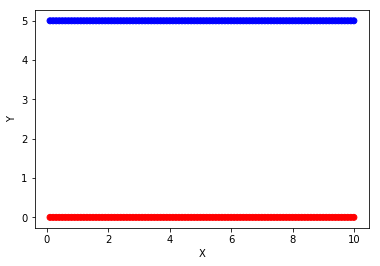

In [14]:
## Perform clustering
Xnew = Evecs[:,[-1,-2]]
kmeans = KMeans(n_clusters=2).fit(Xnew)

## If you want to see the eigen vectors...
## Xone = Evecs[kmeans.labels_==0,:]
## Xtwo = Evecs[kmeans.labels_==1,:]
## plt.plot(Xone[:,0],Xone[:,1],'bo',Xtwo[:,0],Xtwo[:,1],'ro')

## If you want it on the PCA projection...
#Xone = Xsvd[0][kmeans.labels_==0,:]
#Xtwo = Xsvd[0][kmeans.labels_==1,:]
#plt.plot(Xone[:,0],Xone[:,1],'bo',Xtwo[:,0],Xtwo[:,1],'ro')

## Generally speaking, this will do a poor job
## no matter what scaling parameter you choose above...

## Let's quantify the performance
jointPDF = np.zeros([2,2])
for x in range(len(Xassign)):
    jointPDF[Xassign[x],kmeans.labels_[x]] += 1
jointPDF /= len(Xassign)
jointPDF += 0.000000000000001
marginals = np.outer(np.apply_along_axis(np.sum,1,jointPDF),np.apply_along_axis(np.sum,0,jointPDF))
print('Mutual Information')
print(np.sum(jointPDF*np.log2(jointPDF/marginals)))

# Plot the Spectral attempt at the data
# Red will correlate to all 0's seen in kmeans.labels_, blue correlates to all 1's.
plt.scatter(X[:,0], X[:,1], color = [["red", "blue"][i] for i in kmeans.labels_])
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [15]:
# Make some toy data sets
# Set 4: Interlocking Circles
# Make one circle

pi = math.pi

def PointsInCircum(r,n):
    return [(math.cos(2*pi/n*x)*r,math.sin(2*pi/n*x)*r) for x in range(0,n+1)]

f = open("circle-1.in", "w")

circle1 = PointsInCircum(2, 100)

for x in range(100):
    f.write('{:0f} '.format(circle1[x][0]))
    f.write(' {:0f}\n'.format(circle1[x][1]))
    
f.close()
circle1 = np.loadtxt("circle-1.in")
#print(circle1)

# Make one circle shifted to the right.

def PointsInCircum_shift_right(r,n):
    return [(math.cos(2*pi/n*x)*r + 2,math.sin(2*pi/n*x)*r) for x in range(0,n+1)]

f = open("circle-2.in", "w")

circle2 = PointsInCircum_shift_right(2, 100)

for x in range(100):
    f.write('{:0f} '.format(circle2[x][0]))
    f.write(' {:0f}\n'.format(circle2[x][1]))
    
f.close()
circle2 = np.loadtxt("circle-2.in")

# Bring the two circles together

f = open("interlocking_circles.in", "w")

for x in range(100):
    f.write('{:0f} '.format(circle1[x][0]))
    f.write(' {:0f}\n'.format(circle1[x][1]))
    
for x in range(100):
    f.write('{:0f} '.format(circle2[x][0]))
    f.write(' {:0f}\n'.format(circle2[x][1]))
    
f.close()
X = np.loadtxt("interlocking_circles.in")

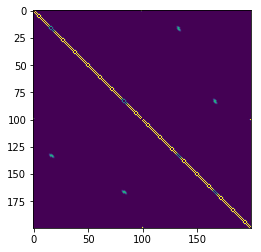

In [16]:
## Spectral Clustering
## Let's implement a simple spectral clustering of the data

# Number of points in each subspace
N1 = 100
N2 = 100

## Calculate pairwise distances (Euclidean)
Xdist = sdist.squareform(sdist.pdist(X))

## Set affinity scaling factor
sigma = .10

## Calculate affinities
Xaff = np.exp((-1.0*np.power(Xdist,2))/(2.0 * np.power(sigma,2)))
Xaff[range(N1+N2),range(N1+N2)] = 0.0
origXaff = Xaff

## Get row sums
Xaff_D = np.diagflat(1.0 / np.sqrt(np.apply_along_axis(np.sum,0,Xaff)))

## Normalization
Xnorm = np.matmul(np.matmul(Xaff_D,Xaff),Xaff_D)

## Might not want to show this if the data sizes (N1,N2)
## are large...
plt.imshow(Xnorm)

## Decomposition
Evals, Evecs = np.linalg.eigh(Xnorm)

[1.         0.99849903 0.99776466]


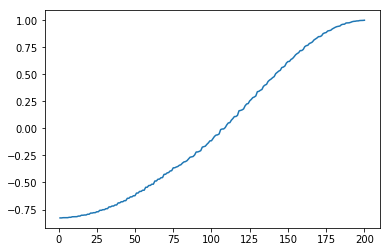

In [17]:
## Next Check the eigenvalues
print(Evals[[-1,-2,-3]])
plt.plot(np.linspace(1,len(Evals),num=len(Evals)),Evals)

Mutual Information
0.3521609513006582


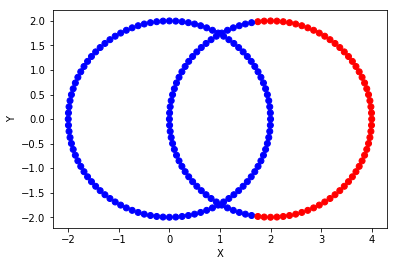

In [18]:
## Perform clustering
Xnew = Evecs[:,[-1,-2]]
kmeans = KMeans(n_clusters=2).fit(Xnew)

## If you want to see the eigen vectors...
## Xone = Evecs[kmeans.labels_==0,:]
## Xtwo = Evecs[kmeans.labels_==1,:]
## plt.plot(Xone[:,0],Xone[:,1],'bo',Xtwo[:,0],Xtwo[:,1],'ro')

## If you want it on the PCA projection...
#Xone = Xsvd[0][kmeans.labels_==0,:]
#Xtwo = Xsvd[0][kmeans.labels_==1,:]
#plt.plot(Xone[:,0],Xone[:,1],'bo',Xtwo[:,0],Xtwo[:,1],'ro')

## Generally speaking, this will do a poor job
## no matter what scaling parameter you choose above...

## Let's quantify the performance
jointPDF = np.zeros([2,2])
for x in range(len(Xassign)):
    jointPDF[Xassign[x],kmeans.labels_[x]] += 1
jointPDF /= len(Xassign)
jointPDF += 0.000000000000001
marginals = np.outer(np.apply_along_axis(np.sum,1,jointPDF),np.apply_along_axis(np.sum,0,jointPDF))
print('Mutual Information')
print(np.sum(jointPDF*np.log2(jointPDF/marginals)))

# Plot the Spectral attempt at the data
# Red will correlate to all 0's seen in kmeans.labels_, blue correlates to all 1's.
plt.scatter(X[:,0], X[:,1], color = [["red", "blue"][i] for i in kmeans.labels_])
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [19]:
# Make some toy data sets
# Set 5: Interlocking U's 
# top half

def PointsInCircum_shift_up(r,n):
    return [(math.cos(2*pi/n*x)*r,math.sin(2*pi/n*x)*r + 3) for x in range(0,n+1)]

f = open("u-1.in", "w")

u1 = PointsInCircum_shift_up(2, 200)

for x in range(100):
    f.write('{:0f} '.format(u1[x+100][0]))
    f.write(' {:0f}\n'.format(u1[x+100][1]))
    
f.close()
u1 = np.loadtxt("u-1.in")

# Interlocking U's: bottom half

def PointsInCircum(r,n):
    return [(math.cos(2*pi/n*x)*r,math.sin(2*pi/n*x)*r) for x in range(0,n+1)]

f = open("u-2.in", "w")

u2 = PointsInCircum(2, 200)

for x in range(100):
    f.write('{:0f} '.format(u2[x][0]))
    f.write(' {:0f}\n'.format(u2[x][1]))
    
f.close()
u2 = np.loadtxt("u-2.in")

# Interlocking U's: Combine the upper and lower half.

f = open("interlocking_us.in", "w")

for x in range(100):
    f.write('{:0f} '.format(u1[x][0]))
    f.write(' {:0f}\n'.format(u1[x][1]))
    
for x in range(100):
    f.write('{:0f} '.format(u2[x][0]))
    f.write(' {:0f}\n'.format(u2[x][1]))
    
f.close()
X = np.loadtxt("interlocking_us.in")

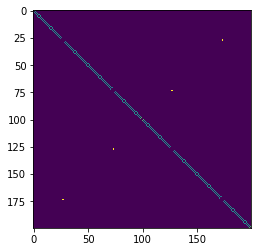

In [20]:
## Spectral Clustering
## Let's implement a simple spectral clustering of the data

# Number of points in each subspace
N1 = 100
N2 = 100

## Calculate pairwise distances (Euclidean)
Xdist = sdist.squareform(sdist.pdist(X))

## Set affinity scaling factor
sigma = .01

## Calculate affinities
Xaff = np.exp((-1.0*np.power(Xdist,2))/(2.0 * np.power(sigma,2)))
Xaff[range(N1+N2),range(N1+N2)] = 0.0
origXaff = Xaff

## Get row sums
Xaff_D = np.diagflat(1.0 / np.sqrt(np.apply_along_axis(np.sum,0,Xaff)))

## Normalization
Xnorm = np.matmul(np.matmul(Xaff_D,Xaff),Xaff_D)

## Might not want to show this if the data sizes (N1,N2)
## are large...
plt.imshow(Xnorm)

## Decomposition
Evals, Evecs = np.linalg.eigh(Xnorm)

[1.         1.         0.99823758]


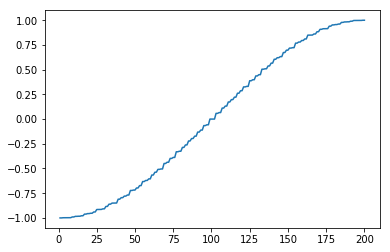

In [21]:
## Next Check the eigenvalues
print(Evals[[-1,-2,-3]])
plt.plot(np.linspace(1,len(Evals),num=len(Evals)),Evals)

Mutual Information
-5.766167706866886e-15


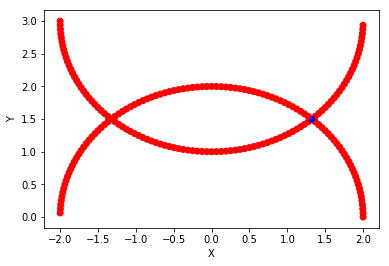

In [22]:
## Perform clustering
Xnew = Evecs[:,[-1,-2]]
kmeans = KMeans(n_clusters=2).fit(Xnew)

## If you want to see the eigen vectors...
## Xone = Evecs[kmeans.labels_==0,:]
## Xtwo = Evecs[kmeans.labels_==1,:]
## plt.plot(Xone[:,0],Xone[:,1],'bo',Xtwo[:,0],Xtwo[:,1],'ro')

## If you want it on the PCA projection...
#Xone = Xsvd[0][kmeans.labels_==0,:]
#Xtwo = Xsvd[0][kmeans.labels_==1,:]
#plt.plot(Xone[:,0],Xone[:,1],'bo',Xtwo[:,0],Xtwo[:,1],'ro')

## Generally speaking, this will do a poor job
## no matter what scaling parameter you choose above...

## Let's quantify the performance
jointPDF = np.zeros([2,2])
for x in range(len(Xassign)):
    jointPDF[Xassign[x],kmeans.labels_[x]] += 1
jointPDF /= len(Xassign)
jointPDF += 0.000000000000001
marginals = np.outer(np.apply_along_axis(np.sum,1,jointPDF),np.apply_along_axis(np.sum,0,jointPDF))
print('Mutual Information')
print(np.sum(jointPDF*np.log2(jointPDF/marginals)))

# Plot the Spectral attempt at the data
# Red will correlate to all 0's seen in kmeans.labels_, blue correlates to all 1's.
plt.scatter(X[:,0], X[:,1], color = [["red", "blue"][i] for i in kmeans.labels_])
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [23]:
# Make some toy data sets
# Set 6: 2 lines making an X
count = -50
f = open("x-1.in", "w")
for x in range(100):
    f.write('{:2.2f}'.format(count))
    f.write(' {:2.2f}\n'.format(count))
    count += 1
    
count = -50
y = 0
for x in range(100):
    y = (-1)*(count)
    f.write('{:2.2f}'.format(count))
    f.write(' {:2.2f}\n'.format(y))
    count += 1

f.close()
X = np.loadtxt("x-1.in")

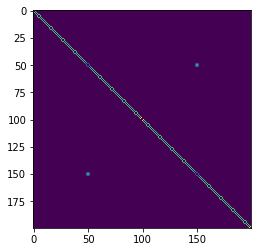

In [24]:
## Spectral Clustering
## Let's implement a simple spectral clustering of the data

# Number of points in each subspace
N1 = 100
N2 = 100

## Calculate pairwise distances (Euclidean)
Xdist = sdist.squareform(sdist.pdist(X))

## Set affinity scaling factor
sigma = 1.0

## Calculate affinities
Xaff = np.exp((-1.0*np.power(Xdist,2))/(2.0 * np.power(sigma,2)))
Xaff[range(N1+N2),range(N1+N2)] = 0.0
origXaff = Xaff

## Get row sums
Xaff_D = np.diagflat(1.0 / np.sqrt(np.apply_along_axis(np.sum,0,Xaff)))

## Normalization
Xnorm = np.matmul(np.matmul(Xaff_D,Xaff),Xaff_D)

## Might not want to show this if the data sizes (N1,N2)
## are large...
plt.imshow(Xnorm)

## Decomposition
Evals, Evecs = np.linalg.eigh(Xnorm)

[1.         0.99941715 0.99940606]


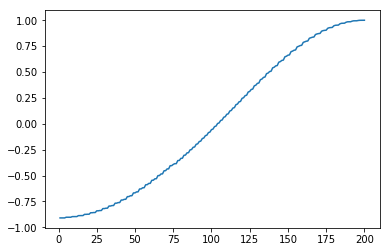

In [25]:
## Next Check the eigenvalues
print(Evals[[-1,-2,-3]])
plt.plot(np.linspace(1,len(Evals),num=len(Evals)),Evals)

Mutual Information
0.2435658449979902


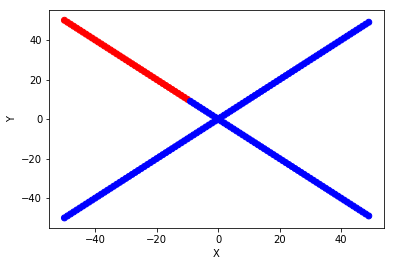

In [26]:
## Perform clustering
Xnew = Evecs[:,[-1,-2]]
kmeans = KMeans(n_clusters=2).fit(Xnew)

## If you want to see the eigen vectors...
## Xone = Evecs[kmeans.labels_==0,:]
## Xtwo = Evecs[kmeans.labels_==1,:]
## plt.plot(Xone[:,0],Xone[:,1],'bo',Xtwo[:,0],Xtwo[:,1],'ro')

## If you want it on the PCA projection...
#Xone = Xsvd[0][kmeans.labels_==0,:]
#Xtwo = Xsvd[0][kmeans.labels_==1,:]
#plt.plot(Xone[:,0],Xone[:,1],'bo',Xtwo[:,0],Xtwo[:,1],'ro')

## Generally speaking, this will do a poor job
## no matter what scaling parameter you choose above...

## Let's quantify the performance
jointPDF = np.zeros([2,2])
for x in range(len(Xassign)):
    jointPDF[Xassign[x],kmeans.labels_[x]] += 1
jointPDF /= len(Xassign)
jointPDF += 0.000000000000001
marginals = np.outer(np.apply_along_axis(np.sum,1,jointPDF),np.apply_along_axis(np.sum,0,jointPDF))
print('Mutual Information')
print(np.sum(jointPDF*np.log2(jointPDF/marginals)))

# Plot the Spectral attempt at the data
# Red will correlate to all 0's seen in kmeans.labels_, blue correlates to all 1's.
plt.scatter(X[:,0], X[:,1], color = [["red", "blue"][i] for i in kmeans.labels_])
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [27]:
# Make some toy data sets
# Set 7: Circle within a circle
# Make a circle

def PointsInCircum_subset(r,n):
    return [((math.cos(2*pi/n*x)*r), math.sin(2*pi/n*x)*r) for x in range(0,n+1)]

f = open("circle-3.in", "w")

circle3 = PointsInCircum_subset(6, 100)

for x in range(100):
    f.write('{:0f} '.format(circle3[x][0]))
    f.write(' {:0f}\n'.format(circle3[x][1]))
    
f.close()
circle3 = np.loadtxt("circle-3.in")

# Circle within a circle

f = open("subset_circles.in", "w")

for x in range(100):
    f.write('{:0f} '.format(circle1[x][0]))
    f.write(' {:0f}\n'.format(circle1[x][1]))
    
for x in range(100):
    f.write('{:0f} '.format(circle3[x][0]))
    f.write(' {:0f}\n'.format(circle3[x][1]))
    
f.close()
X = np.loadtxt("subset_circles.in")

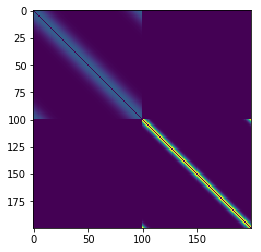

In [28]:
## Spectral Clustering
## Let's implement a simple spectral clustering of the data

# Number of points in each subspace
N1 = 100
N2 = 100

## Calculate pairwise distances (Euclidean)
Xdist = sdist.squareform(sdist.pdist(X))

## Set affinity scaling factor
sigma = 1.0

## Calculate affinities
Xaff = np.exp((-1.0*np.power(Xdist,2))/(2.0 * np.power(sigma,2)))
Xaff[range(N1+N2),range(N1+N2)] = 0.0
origXaff = Xaff

## Get row sums
Xaff_D = np.diagflat(1.0 / np.sqrt(np.apply_along_axis(np.sum,0,Xaff)))

## Normalization
Xnorm = np.matmul(np.matmul(Xaff_D,Xaff),Xaff_D)

## Might not want to show this if the data sizes (N1,N2)
## are large...
plt.imshow(Xnorm)

## Decomposition
Evals, Evecs = np.linalg.eigh(Xnorm)

[1.         0.99911373 0.98287016]


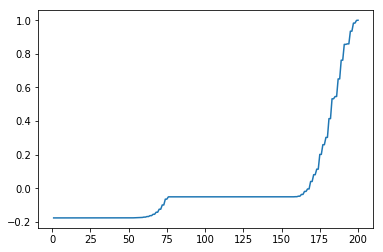

In [29]:
## Next Check the eigenvalues
print(Evals[[-1,-2,-3]])
plt.plot(np.linspace(1,len(Evals),num=len(Evals)),Evals)

Mutual Information
0.9999999999998976


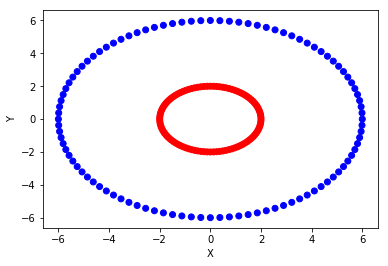

In [30]:
## Perform clustering
Xnew = Evecs[:,[-1,-2]]
kmeans = KMeans(n_clusters=2).fit(Xnew)

## If you want to see the eigen vectors...
## Xone = Evecs[kmeans.labels_==0,:]
## Xtwo = Evecs[kmeans.labels_==1,:]
## plt.plot(Xone[:,0],Xone[:,1],'bo',Xtwo[:,0],Xtwo[:,1],'ro')

## Generally speaking, this will do a poor job
## no matter what scaling parameter you choose above...

## Let's quantify the performance
jointPDF = np.zeros([2,2])
for x in range(len(Xassign)):
    jointPDF[Xassign[x],kmeans.labels_[x]] += 1
jointPDF /= len(Xassign)
jointPDF += 0.000000000000001
marginals = np.outer(np.apply_along_axis(np.sum,1,jointPDF),np.apply_along_axis(np.sum,0,jointPDF))
print('Mutual Information')
print(np.sum(jointPDF*np.log2(jointPDF/marginals)))

# Plot the Spectral clustering attempt at the data
# Red will correlate to all 0's seen in kmeans.labels_, blue correlates to all 1's.
plt.scatter(X[:,0], X[:,1], color = [["red", "blue"][i] for i in kmeans.labels_])
plt.ylabel('Y')
plt.xlabel('X')
plt.show()